# Digital House - Data Science a Distancia

## Trabajo Final

### Autores: Daniel Borrino, Ivan Mongi, Jessica Polakoff, Julio Tentor
<p style="text-align:right;">Agosto 2022</p>

---
# Objetivo del Trabajo Final

#### Demostrar que aprendimos conceptos y desarrollamos habilidades para obtener un modelo de aprendizaje automático que razonablemente predice un objetivo seleccionado en un conjunto de datos.


---
### Contexto

???

---
### Metas

1. Lograr un modelo o modelos de aprendizaje automático que ???.

2. Presentar la conclusión del trabajo y los aspectos relevantes del desarrollo realizado


---
#### Aspectos técnicos

La notebook se ejecuta correctamente en una instalación estándar de Anaconda versión *4.12.0 build  3.21.6, Python 3.9.7*


---

#### Necessary libraries

In [1]:
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import warnings
warnings.filterwarnings('ignore')


#### Style

In [4]:
sns.set()
plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 18
sns.mpl.rcParams['axes.labelsize'] = 14


In [5]:
from IPython.display import HTML


---
#### Los datos originales

Los datos originales corresponden a la [competencia en Datacamp](https://app.datacamp.com/learn/competitions/chocolate-bar-ratings) finalizada el 30 de junio de 2022.

La meta del trabajo final es **???**, ....

---


In [6]:
import pandas as pd
import random

def data_generator() :
    u'''Data generator for final work of data science at digital house
    
    
    
    Returns one dataset
    '''

    data = pd.read_csv('./data/chocolate_bars.csv')

    # remove duplicates and missing values
    data.dropna(axis='index', how='any', inplace=True)
    data.drop_duplicates(inplace=True)
    # set sequential and successive index values
    data.reset_index(drop=True)

    
    def get_rating_label(rating_value) :
        u'''
        '''
        if rating_value >= 1.0 and rating_value <= 1.9 :
            return 0
        if rating_value >= 2.0 and rating_value <= 2.9 :
            return 1
        if rating_value >= 3.0 and rating_value <= 3.49 :
            return 2
        if rating_value >= 3.5 and rating_value <= 3.9 :
            return 3
        if rating_value >= 4.0 and rating_value <= 5.0 :
            return 4
        return -1
#


    # 
    data['rating_tag'] = data['rating'].apply(get_rating_label)
    data = data.astype({'rating_tag' : 'category'})
    
#     data['left'] = data['left'].apply(lambda x : 0 if x == 'no' else 1)

#     # reorder features 
#     cols = ['left', 'department', 'salary', 'bonus', 'promoted', 'projects', 
#              'tenure', 'review', 'satisfaction', 'avg_hrs_month']

#     data = data[cols]
#     data[['review', 'satisfaction', 'avg_hrs_month']] = data[['review', 'satisfaction', 'avg_hrs_month']].apply(lambda x: round(x,0))
    
#     # to have more legibility
#     data['left_means'] = data['left'].map({0 : 'Permanece', 1 : 'Renuncia'})    

#     # set some features types
#     data = data.astype({'department' : 'category', 
#                         'salary' : 'category', 
#                         'tenure' : 'int64',
#                         'left_means' : 'category' 
#                        })

    return data

---


In [7]:
def set_figure(row, col, suptitle) :
    u''' Activate matplot figure setting size and super title
    '''
    fig = plt.figure(figsize=(row, col));
    fig.suptitle(suptitle, 
                 verticalalignment='center', fontsize='xx-large', fontweight='extra bold');
    return fig

In [8]:
def show_some_plots(data, columns, target=None, cols=4) :
    u'''
    Display some countplots graphs for specific columns in dataset

    args
        data : dataset
        columns : series to count
        target : binary values to split the count; if None draw a simple countplot
        cols : number of columns for subplots
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) // cols) + 1
    if target != None :
        rows *= 2
    for i, column in enumerate(data[columns]) :
        if target == None :
            plt.subplot(rows, cols, i+1)
            sns.countplot(y=data[column])
            plt.tight_layout();
            plt.xlabel(None);
        else :
            # standar count plot
            plt.subplot(rows, cols, i*2+1)
            sns.countplot(y=data[column])
            plt.tight_layout();
            plt.xlabel(None);
            
            # count by target values
            plt.subplot(rows, cols, i*2+2)
            sns.countplot(data=data, x=column, hue=target)
            plt.tight_layout();
            plt.xlabel(column);
    return

In [9]:
def show_some_hists(data, columns, target=None, cols=4, stat='count') :
    u'''
    Display some histograms graphs for specific columns in dataset

    args
        data : dataset
        columns : series to show 
        target : binary values to split the count; if None draw a simple histplot
        cols : number of columns for subplots
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) // cols) + 1
    for i, column in enumerate(data[columns]) :
        try :
            plt.subplot(rows, cols, i+1)
            sns.histplot(data=data, x=column, kde=True, hue=target, stat=stat)
            plt.tight_layout();
            plt.xlabel(column);
            plt.ylabel(None);
        except :
            pass
    return

In [10]:
def show_some_boxplots(data, columns, target=None, cols=4) :
    u'''
    Display some boxplots graphs for specific columns in dataset

    args
        data : dataset
        columns : series to show
        target : binary values to split the histogram; if None draw a simple histplot
        cols : number of columns for subplots
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) // cols) + 1
    for i, column in enumerate(data[columns]) :
        plt.subplot(rows, cols, i+1)
        sns.boxplot(data=data, x=target, y=column, palette="RdYlBu")
        plt.tight_layout();
        plt.xlabel(None);
        plt.ylabel(column);
    return

---
<a name="Dataset"></a>

### Dataset

Los datos originales son de [Manhattan Chocolate Society](http://flavorsofcacao.com/mcs_index.html)

Las características en el conjunto de datos son:

    - id                   : Identificador de la revisión de la barra de chocolate
    - manufacturer         : Nombre del manufactorador de la barra de chocolate
    - company_location     : Ubicación del manufactorador de la barra de chocolate
    - year_reviewed        : Año de la revisión de 2006 al 2021
    - bean_origin          : Origen del grano de cacaco
    - bar_name             : Nombre de la barra de chocolate
    - cocoa_percent        : Porcentaje de cacaco en la barra de chocolate
    - num_ingredients      : Número de ingredientes en la barra de chocolate
    - ingredients          : Ingredientes (ver codificación)
    - review               : Revisión, análisis o evaluación de la barra de chocolate
    - rating               : Clasificación (ver escala)
    

Codificación de ingredientes en la barra de chocolate

    - B  : Beans (grano)
    - S  : Sugar (azucar)
    - S* : Sweetener (edulcolrante distinto de azucar)
    - C  : Cocoa Butter (mantequilla de cacaco)
    - V  : Vanilla (vainilla)
    - L  : Lecithin (lecitina)    
    - Sa : Salt (sal)

Escala de clasificación de una barra de chocolate

    - 1.0  a 1.9  : Unpleasant (Desagradable)
    - 2.0  a 2.9  : Disappointing (Decepcionante)
    - 3.0  a 3.49 : Recommended (Recomendable)
    - 3.5  a 3.9  : Highly Recommended (Altamente Recomendable)
    - 4.0  a 5.0  : Oustanding (Sobresaliente)



In [11]:
# Generar los datos para el trabajo final
data = data_generator()

In [12]:
data.dtypes

id                     int64
manufacturer          object
company_location      object
year_reviewed          int64
bean_origin           object
bar_name              object
cocoa_percent        float64
num_ingredients      float64
ingredients           object
review                object
rating               float64
rating_tag          category
dtype: object

In [13]:
data.shape

(2443, 12)

In [14]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,2443.0,1451.520262,755.521714,5.0,833.0,1474.00,2100.0,2712.0
year_reviewed,2443.0,2014.485878,3.957507,2006.0,2012.0,2015.00,2018.0,2021.0
cocoa_percent,2443.0,71.496725,5.156974,42.0,70.0,70.00,74.0,100.0
num_ingredients,2443.0,3.041343,0.913728,1.0,2.0,3.00,4.0,6.0
rating,2443.0,3.210090,0.428370,1.0,3.0,3.25,3.5,4.0


In [15]:
data

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,rating_tag
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,2
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,3
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,3
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,2
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75,1
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75,3
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00,2
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25,2


---

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

def My_MultiLabel(data, col, classes=None, prefix=None) :
    u''' Converts the values from some feature to a multilabel binary matrix
    
    Takes all comma separated values from one feature in each row and generate a 
    multi label binary matrix that has the same number of rows and as many series 
    as distintct values was found in all rows of the feature
    
    Args
    
    Return
    
    '''
    
    work = pd.DataFrame(data[col])
    work['text'] = work[col].apply( lambda x : set( [t for t in x.lower().replace(' ','').split(sep=',')] ) )

    mlb = MultiLabelBinarizer(classes=classes)
    work = pd.DataFrame(mlb.fit_transform(work['text']))
    
    labels = mlb.classes_
    if prefix != None :
        for i in range(len(labels)) :
            labels[i] = prefix + labels[i]
    work.columns = labels
    
    
    return work

In [17]:
def ingredients_process(data) :
    u'''
    
    
    '''
    classes = np.array(['b', 'c', 'l', 's', 's*', 'sa', 'v'])
    work = My_MultiLabel(data=data, col='ingredients', classes=classes, prefix=None)
    work.rename(columns={'b'  : 'i_beans',
                         'c'  : 'i_cocoa_butter',
                         'l'  : 'i_lecithin',
                         's'  : 'i_sugar',
                         's*' : 'i_sweetener',
                         'sa' : 'i_salt',
                         'v'  : 'i_vanilla'
                        }, inplace=True)
    return work

In [18]:
work = ingredients_process(data)
work.reset_index(drop=True)
work.index = data.index

ingredients_features = list(work.columns)

In [19]:
pepe = pd.concat([data, work], axis='columns', ignore_index=True)
pepe.columns = list(data.columns) + list(work.columns)


In [20]:
data = pepe.copy()

In [21]:
data

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,rating_tag,i_beans,i_cocoa_butter,i_lecithin,i_sugar,i_sweetener,i_salt,i_vanilla
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,2,1,1,0,1,0,0,0
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,3,1,1,0,1,0,0,0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,3,1,1,0,1,0,0,0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,2,1,1,0,1,0,0,0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,2,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75,1,1,1,0,0,1,1,0
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75,3,1,1,0,1,0,0,0
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00,2,1,1,0,1,0,0,0
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25,2,1,1,0,1,0,0,0


---

In [22]:
def show_corr(data, target) :
    u'''
    '''
    
    corr = data.corr()
    cols = corr[target].sort_values(ascending=False).keys()
    
    topc = corr.loc[cols, cols]
    mask = np.zeros_like(topc)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(data=topc, 
                cmap=sns.diverging_palette(h_neg=350, h_pos=150, center='light', as_cmap=True), 
                annot=True, fmt=".2f", cbar=False, mask=mask)
    
    return

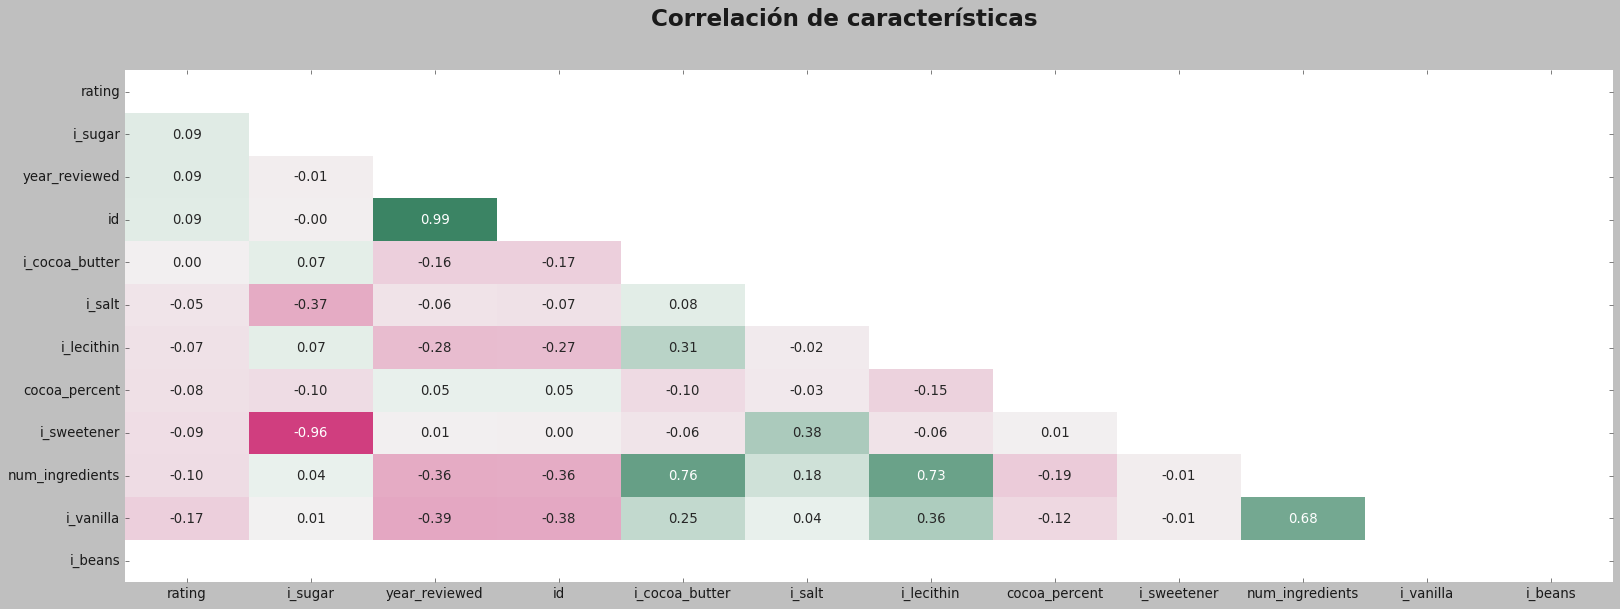

In [23]:

fig = set_figure(24, 8, 'Correlación de características')
show_corr(data, 'rating')


---



In [24]:
 # _ = sns.pairplot(data, kind="reg", diag_kind="kde")

---


In [25]:

from sklearn.naive_bayes import CategoricalNB

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# need for some models
from sklearn.preprocessing import StandardScaler


from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix


class Model() :
    u'''
    Models plain object, used to keep values for each model
    '''
    
    def __init__(self, name, model, scaler=None, gs_params=None) :
        u'''
        Object intializacion
        
        args
            name : text name of model
            model : model instance
            scaler : scaler instance, apply only if not None
        
        '''
    
        self.name = name
        self.model = model
        self.scaler = scaler
        self.isfit = False
        
        self.gs_params = gs_params
        self.gs_model = None
        self.gs_isfit = False
        
        self.accuracy = 0
        self.precision = 0
        self.recall = 0
        self.f1 = 0
        self.auc_roc = 0
        
        self.confusion = None
        self.classification_report = None
        
        self.fpr = None
        self.tpr = None
        self.fpr_proba = None
        self.tpr_proba = None
        
        return
    

    def train(self, X_data, y_data) :
        u'''
        Train model
        '''

        if self.gs_model == None : # not have a gridsearch model
            if self.scaler == None : # not need to scaler
                self.model.fit(X_data, y_data)
            else :
                self.model.fit(self.scaler.fit_transform(X_data), y_data)
            self.isfit = True
        else :
            if self.scaler == None :
                self.gs_model.fit(X_data, y_data)
            else :
                self.gs_model.fit(self.scaler.fit_transform(X_data), y_data)
            self.isfit = True
            self.gs_isfit = True
            
        return
    
    
    def predict(self, X_data, y_data, target_names=None) :
        u'''
        Predict values
        '''
        
        if not self.isfit :
            raise Exception('MODELO NO ENTRENADO ...')
            
        if not self.gs_isfit :
            if self.scaler == None :
                y_pred = self.model.predict(X_data)
                y_pred_proba = self.model.predict_proba(X_data)
            else :
                y_pred = self.model.predict(self.scaler.fit_transform(X_data))
                y_pred_proba = self.model.predict_proba(m.scaler.fit_transform(X_data))
        else :
            if self.scaler == None :
                y_pred = self.gs_model.predict(X_data)
                y_pred_proba = self.gs_model.predict_proba(X_data)
            else :
                y_pred = self.gs_model.predict(self.scaler.fit_transform(X_data))
                y_pred_proba = self.gs_model.predict_proba(m.scaler.fit_transform(X_data))
                
        self.accuracy = metrics.accuracy_score(y_data, y_pred)
        # self.precision = metrics.precision_score(y_data, y_pred)
        # self.recall = metrics.recall_score(y_data, y_pred)
        # self.f1 = metrics.f1_score(y_true=y_data, y_pred=y_pred)
        
        # self.fpr, self.tpr, _ = metrics.roc_curve(y_data, y_pred)
        # self.auc_roc = metrics.auc(self.fpr, self.tpr)
        
        self.confusion = confusion_matrix(y_data, y_pred)
        self.classification_report = classification_report(y_data, y_pred, 
                                                           digits=6, 
                                                           target_names=target_names, 
                                                           output_dict=False)

        # self.fpr_proba, self.tpr_proba, _ = metrics.roc_curve(y_data, y_pred_proba[:, 1])

        return y_pred


---

### Some names and lists useful

In [26]:


target = 'rating_tag'
target_names = ['Unpleasant', 'Disappointing', 'Recommended', 'Highly Recommended', 'Oustanding']

categorical_features = ['manufacturer', 'company_location', 'bean_origin', 'bar_name', 'ingredientes', 'review']
numeric_features = ['cocoa_percent']
ordinal_features = ['id', 'year_reviewed', 'num_ingredients']

In [27]:
base_line_features = numeric_features + ingredients_features

---



In [28]:

from sklearn.model_selection import train_test_split


X = data[base_line_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test :", y_test.shape)

X_train: (1636, 8)
y_train: (1636,)
X_test:  (807, 8)
y_test : (807,)


---
<a name="Evaluate_some_models"></a>

### Evaluate some models

In [29]:
# definir los modelos a entrenar
models = []

# ===================================================================================================================
u'''
Navie Bayes Gaussiano
=====================
var_smoothing : estabilización del cálculo, se agrega a la varianza
'''

models.append( Model(name='Naive Bayes Categorical', model=CategoricalNB(), 
                    gs_params={'alpha': [1e-09, 1e-08,1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1, 10]} ) )

# ===================================================================================================================
u'''
Regresión Logística
===================
C : regularización, valores pequeños implican mayor fuerza en la regularización
penalty : penalizaciones
    l1 y l2 por separado
    elasticnet (l1 y l2 juntos)
solver : algoritmo de optimización
    saga (permite las penalizaciones)
'''
# models.append( Model(name='Regresión Logística', model=LogisticRegression(),
#                     gs_params={'C': [0.1,0.5,0.8, 1, 10, 100], 
#                                'penalty': ['l1', 'l2', 'elasticnet'], 
#                                'solver': ['saga']} ) )

# ===================================================================================================================
u'''
Vecinos más Cercanos
====================
n_neighbors : número de vecinos
weights : función de peso
    uniform : todos los puntos pesan igual
    distance : los puntos más cercanos pesan más que el resto
p : Kinkowski metric; 1 = manhattan_distance, 2 = euclidian_distance
'''

# models.append( Model(name='k-vecinos más Cercanos', model=KNeighborsClassifier(), scaler=StandardScaler(),
#                     gs_params={'n_neighbors': range(2,21), 
#                                'weights' : ['uniform', 'distance'], 
#                                'p' : [1, 2]} ) )

# ===================================================================================================================
# Estos modelos se utilizan en clasficación pero no aprendimos a utilizarlos

models.append( Model(name='Árbol de Decisión', model=DecisionTreeClassifier(random_state=0) ) )
# models.append( Model(name='Gradiente Booster', model=GradientBoostingClassifier() ) )

---



In [30]:
def show_metrics(models, show_classification_report=False) :
    u'''

    args:
        models : list of models objects


        df = pd.concat([df, 
                        pd.DataFrame(columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'f1', 'AUC-ROC'], 
                                     data=[ m.name, m.accuracy, m.precision, m.recall, m.f1, m.auc_roc ])], 
                       axis=0, ignore_index=True)


    '''
    
    # columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'f1', 'AUC-ROC'], 
    
    df = pd.DataFrame()
    for m in models :
        df = pd.concat([df, 
                        pd.DataFrame(
                                     data=[[ m.name, m.accuracy, m.precision, m.recall, m.f1, m.auc_roc ]])], 
                       axis=0, ignore_index=True)
    df.columns = ['Modelo', 'Accuracy', 'Precision', 'Recall', 'f1', 'AUC-ROC']
    
    display(df)

    if show_classification_report :
        for m in models :
            display(HTML('<b>' + m.name + '</b>'))
            print(m.classification_report)
    
    df = df.sort_values(by='f1', axis='index', ascending=False)

    return df

In [31]:
def show_confusion_matrix(models, cols=4, target_names=None) :
    u'''
    Display some confusion matrix graphs

    args
        models : list of models objects
        cols : number of columns for the subplot
    
    '''
    
    rows = (len(models) // cols) + 1
    
    for i, m in enumerate(models) :
        plt.subplot(rows, cols, i+1)
        df = pd.DataFrame(data=m.confusion)
        if target_names != None :
            df.columns = target_names
            df.index = target_names
        sns.heatmap(data=df, annot=True, center=0, fmt='d', cmap='YlGnBu')
        plt.tight_layout();
        plt.title(m.name);
        plt.ylabel(None)
        plt.xlabel(None)
        
    return

In [32]:
def show_roc_curve(models, X_data, y_data) :
    u'''
    Display some roc curves matrix graphs

    args
        models : list ob models objects
        X_data : 2D array with features
        y_data : 1D array with targets
    
    '''
    
    plt.tight_layout();
    plt.axis([0, 1.01, 0, 1.05])
    plt.ylabel('TPR / Sensitivity (Recall)')
    plt.xlabel('1 - Specificty')
    
    legend = []
    
    for i, m in enumerate(models) :
        
        if not m.gs_isfit :
            if m.scaler == None :
                y_pred = m.model.predict_proba(X_data)
            else :
                y_pred = m.model.predict_proba(m.scaler.fit_transform(X_data))
        else :
            if m.scaler == None :
                y_pred = m.gs_model.predict_proba(X_data)
            else :
                y_pred = m.gs_model.predict_proba(m.scaler.fit_transform(X_data))
        
        
        
        fpr, tpr, _ = metrics.roc_curve(y_data, y_pred[:, 1])

        legend.append(m.name)
        
        plt.plot(fpr, tpr)

    plt.plot(np.arange(0, 1, step=0.01), np.arange(0, 1, step=0.01), linestyle='-.' )
    plt.legend(legend, loc='lower right');
    return

---



In [33]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

import time

def find_best_parameters(models) :
    u'''
    Find best parameters for classifie models
    
    args
        models : list of models objects    
    '''
    
    folds=StratifiedKFold(n_splits=5, random_state=22, shuffle=True)

    display(HTML('<h1>Buscando los mejores parámetros</h1>'))
    
    for m in models :
        if m.gs_params != None :
            print('Gridsearch para ', m.name, '...', end=' ')

            tic = time.time()
            m.gs_model = GridSearchCV(estimator=m.model, param_grid=m.gs_params, scoring='f1', cv=folds, n_jobs=4)
            m.train(X_train, y_train)
            toc = time.time()
            print(str(toc-tic) + ' Segundos')
        else :
            print('Gridsearch para ', m.name, 'None params', end=' ')
            tic = time.time()
            m.train(X_train, y_train)
            toc = time.time()
            print(str(toc-tic) + ' Segundos')

#
    print()
    display(HTML('<h2>Parámetros hallados</h2>'))
    print()
    for m in models :
        if m.gs_params != None :
            print ('Best score (f1)', m.gs_model.best_score_)
            print ('Best estimator ', m.gs_model.best_estimator_)
            print ('Best params    ', m.gs_model.best_params_)
            print()

    return

find_best_parameters(models=models)

Gridsearch para  Naive Bayes Categorical ... 1.8208441734313965 Segundos
Gridsearch para  Árbol de Decisión None params 0.002992391586303711 Segundos




Best score (f1) nan
Best estimator  CategoricalNB(alpha=1e-09)
Best params     {'alpha': 1e-09}



---



---



---



,Modelo,Accuracy,Precision,Recall,f1,AUC-ROC
0,Naive Bayes Categorical,0.386617,0,0,0,0
1,Árbol de Decisión,0.389095,0,0,0,0


                    precision    recall  f1-score   support

        Unpleasant   0.000000  0.000000  0.000000         1
     Disappointing   0.382979  0.102273  0.161435       176
       Recommended   0.396373  0.500000  0.442197       306
Highly Recommended   0.384196  0.498233  0.433846       283
        Oustanding   0.000000  0.000000  0.000000        41

          accuracy                       0.386617       807
         macro avg   0.232710  0.220101  0.207496       807
      weighted avg   0.368553  0.386617  0.355022       807



                    precision    recall  f1-score   support

        Unpleasant   0.000000  0.000000  0.000000         1
     Disappointing   0.342105  0.221591  0.268966       176
       Recommended   0.401288  0.611111  0.484456       306
Highly Recommended   0.390135  0.307420  0.343874       283
        Oustanding   0.500000  0.024390  0.046512        41

          accuracy                       0.389095       807
         macro avg   0.326705  0.232903  0.228761       807
      weighted avg   0.388987  0.389095  0.365309       807



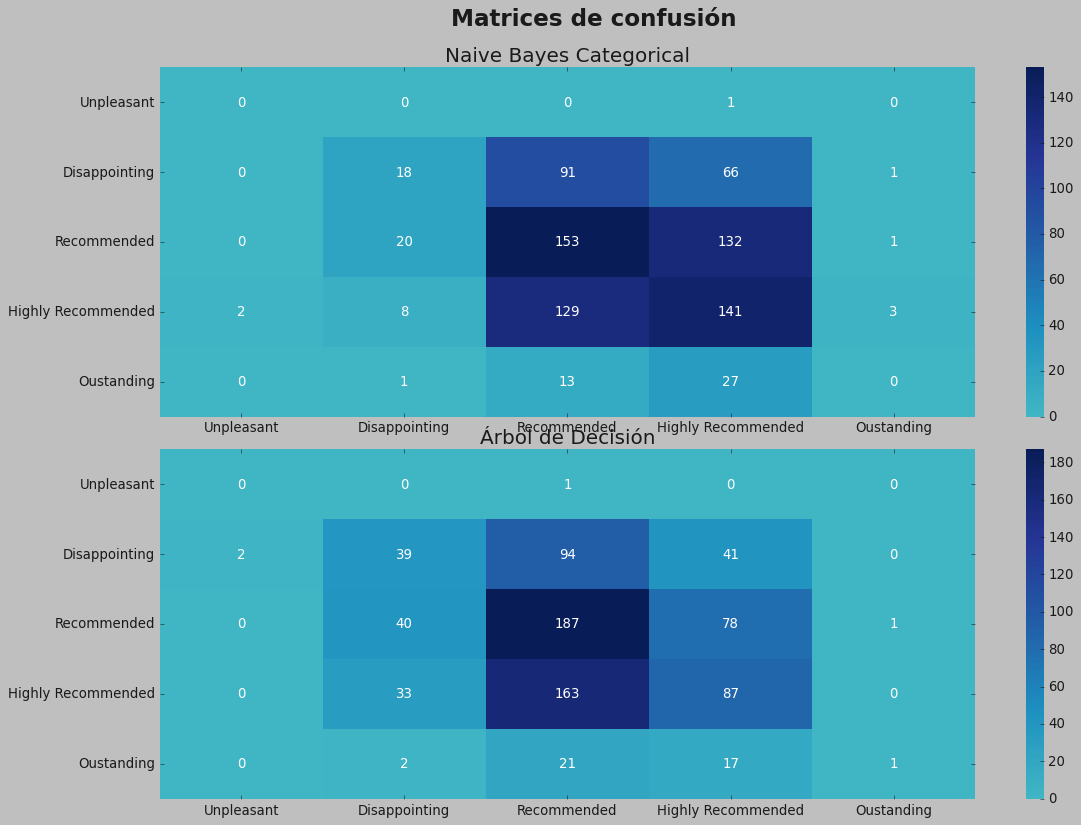

In [34]:
    
for m in models :
    m.predict(X_test, y_test, target_names=target_names)

best_model = models[ show_metrics(models, show_classification_report=True).index[0] ]

fig = set_figure(15, 15, 'Matrices de confusión')
show_confusion_matrix(models, 1, target_names=target_names)


# fig = set_figure(24, 6, 'ROC Curves - Gridsearch')
# show_roc_curve(models, X_test, y_test)



---



---

